Мен Student Performance деректерін Kaggle сайтынан алдым. Бұл деректерде студенттің бағасына әсер ететін түрлі факторлар бар, олар анализ жасауға өте жақы. Проекттің мақсаты да осыған сәйкес, яғни студенттің үлгеріміне қандай факторлар көбірек әсер ететін іздеу, табу. 
Бұл жерде бірнеше сұрақты ашып кеткім келді, олар:
1.Жыныс бойынша студенттердің бағалары мен сабаққа келмеу деңгейлері қандай?
2.Ата-аналардың кәсібі студенттердің бағаларына және сабаққа келмеуіне қалай әсер етеді?
3.Студенттердің жынысы мен отбасы көлемі олардың бағаларына қалай әсер етеді?
4.Қорытынды емтихан (G3) бойынша ең жоғары ұпай жинаған студенттер кімдер?
5.Студенттердің бағалары мен олардың оқу барысында кездестірген қиындықтары (сабаққа келмеу, сәтсіздіктер саны, ата-ананың білім деңгейі және т.б.) арасындағы байланыс қандай?
6.Академиялық үлгерім (G3) мен ішімдік ішу әдеттері арасындағы байланыс қандай?
7.Ата-ананың жұмысы (Mjob, Fjob) мен ата-ана жағдайы (Pstatus) студенттердің қорытынды бағаларына қалай әсер етеді?
Студенттердің академиялық үлгерімін жақсарту үшін қандай әлеуметтік және жеке факторлардың көбірек әсер ететінін анықтау, білім беру процесінде маңызды тұжырымдар жасау және нәтижелерді нақты ұсыныстарға айналдыру.

Менің деректерімде бос орындар болмағандықтан, оның қалай жасалатыны маңызды болғандықтан, деректерімнен кей орындарды өшірдім.

In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/Амин/Downloads/student-por.csv', sep=';')
print(df.columns)

print(df.isnull().sum())
df.loc[df.sample(n=200, random_state=42).index, 'studytime'] = np.nan
df.loc[df.sample(n=50, random_state=42).index, 'G1'] = np.nan
df.loc[df.sample(n=20, random_state=42).index, 'failures'] = np.nan
df.loc[df.sample(n=40, random_state=42).index, 'sex'] = np.nan

#df.to_csv('modified_dataset.csv', index=False)

print("Файл с пропущенными значениями сохранен как 'modified_dataset.csv'.")

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'fatherd', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
fatherd       0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Файл с пропущенными значениями сохранен как 'modified_dataset.csv'.


Осылай деректерімнің сипаттамалық статистикасын шығарып, бос орындарды мода, медиана, орташа мәндер сынды мәндермен толтырып шықтым:

In [17]:
df1 = pd.read_csv("C:\\Users\\Амин\\Downloads\\modified_dataset.csv")
print(df1)
print(df1.info())
print(df1.describe())
print(df1.isnull().sum())
print(df1.dtypes)
df1['studytime'] = df1['studytime'].fillna(df1['studytime'].median())
df1['failures'] = df1['failures'].fillna(df1['failures'].mean())
df1['G1'] = df1['G1'].fillna(df1['G1'].median())
df1['sex'] = df1['sex'].fillna(df1['sex'].mode()[0])

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

Категориялық деректерді сандық мәндерге айналдыруға болады. Ол бізге қандай да бір модель не регрессия құрғанда қажет болады:

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
print(df['sex'].head())

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int32


Квартильаралық диапазон (IQR) әдісін қолдана отырып, көрсетілген мәндердің ауытқуларын жоямыз:

In [19]:
def remove_outliers(df1, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df_cleaned

df_cleaned = remove_outliers(df1, 'G1')
df_cleaned = remove_outliers(df_cleaned, 'G2')
df_cleaned = remove_outliers(df_cleaned, 'G3')
df_cleaned = remove_outliers(df_cleaned, 'absences')

print(df_cleaned.shape)

print()

(594, 33)



Осылай тек бір айнымалының бір жауабын бағалармен датафреймін жасап, қолдана аламыз:

In [20]:
df_loc = df1.loc[df1['sex'] == 'M', ['G1', 'G2', 'G3']]
print(df_loc.head())

      G1  G2  G3
5   12.0  12  13
6   13.0  12  13
8   15.0  16  17
9   12.0  12  13
12  12.0  13  12


 Әр жыныс бойынша бағалардың (G1, G2, G3) және сабаққа келмеудің (сабаққа келмеу) орташа мәндерін есептеймін.

In [21]:
grouped_by_sex = df1.groupby('sex')[['G1', 'G2', 'G3', 'absences']].mean()
print(grouped_by_sex)

            G1         G2         G3  absences
sex                                           
F    11.454774  11.846734  12.268844  3.545226
M    10.988048  11.131474  11.330677  3.840637


Ата-аналардың кәсіптері оқушылардың бағаларына (G1, G2, G3) және жіберіп алған сабақтар санына (сабаққа келмеу) қалай әсер ететінін талдау.

In [22]:
grouped_by_mjob = df1.groupby('Mjob')[['G1', 'G2', 'G3', 'absences']].mean()
grouped_by_fjob = df1.groupby('Fjob')[['G1', 'G2', 'G3', 'absences']].mean()
print(grouped_by_mjob)
print(grouped_by_fjob)

                 G1         G2         G3  absences
Mjob                                               
at_home   10.422222  10.711111  11.044444  3.570370
health    12.166667  12.645833  13.062500  2.104167
other     11.201550  11.426357  11.670543  3.810078
services  11.551471  11.720588  12.147059  4.301471
teacher   12.013889  12.694444  13.138889  3.111111
                 G1         G2         G3  absences
Fjob                                               
at_home   10.404762  10.785714  11.428571  4.452381
health    11.956522  12.260870  12.565217  3.043478
other     11.283379  11.542234  11.891008  3.768392
services  11.143646  11.370166  11.629834  3.397790
teacher   12.416667  13.333333  13.583333  3.333333


Оқушының жынысы мен отбасы санының олардың бағаларымен байланысын талдау үшін жиынтық кесте құрамын.

In [23]:
pivot_table = df1.pivot_table(values=['G1', 'G2', 'G3'], index=['sex', 'famsize'], aggfunc='mean')
print(pivot_table)

                    G1         G2         G3
sex famsize                                 
F   GT3      11.447099  11.849829  12.266212
    LE3      11.476190  11.838095  12.276190
M   GT3      10.743902  10.865854  11.000000
    LE3      11.448276  11.632184  11.954023


Қорытынды емтиханда (G3) ең жоғары балл жинаған студенттерді анықтау үшін деректерді сұрыптау.

In [24]:
df_sorted = df1.sort_values(by='G3', ascending=False)
print(df_sorted.head(10))

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
338     GP   F   17       R     LE3       T     3     1  services     other   
636     MS   F   18       U     GT3       T     4     4   teacher   teacher   
185     GP   M   16       U     GT3       T     1     0     other     other   
596     MS   F   17       U     GT3       T     4     2     other     other   
594     MS   F   18       U     GT3       T     4     4   teacher   teacher   
606     MS   F   17       U     GT3       T     4     2   teacher     other   
314     GP   M   17       R     GT3       T     1     2   at_home   at_home   
113     GP   M   15       U     LE3       T     4     2   teacher     other   
617     MS   F   18       U     LE3       T     1     1   at_home  services   
327     GP   F   18       R     LE3       T     1     1   at_home     other   

     ... famrel freetime  goout  Dalc  Walc health absences    G1  G2  G3  
338  ...      3        1      2     1     1      3    

Ата-ананың білім деңгейі, отбасындағы қарым-қатынас,  сәтсіздіктер саны, сабаққа келмеу және оқушылардың үлгерімі сияқты әртүрлі факторлар арасындағы байланыстарды талдау үшін корреляциялық матрицаны құрастырамын.. Жылу картасы осы айнымалылар арасындағы корреляция дәрежесін бейнелейді, бұл студенттердің үлгеріміне әсер етуі мүмкін ықтимал заңдылықтар мен қатынастарды анықтауға мүмкіндік береді.

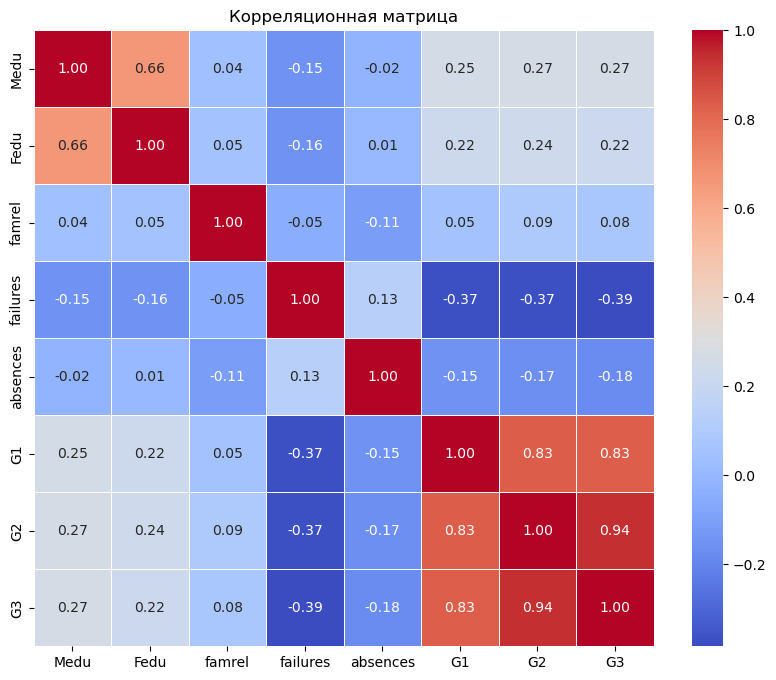

In [25]:
correlation_matrix = df_cleaned[['Medu', 'Fedu', 'famrel', 'failures', 'absences', 'G1', 'G2', 'G3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

Қорытынды емтихандағы (G3) ұпайлары негізінде студенттерді тәуекел деңгейі бойынша (төмен, орташа, жоғары) жіктеу және жұмыс күндері мен демалыс күндері алкогольді тұтынудың орташа деңгейін есептеу. Бұл академиялық үлгерім деңгейлері мен ішімдік ішу әдеттерінің бір-бірімен қалай байланысты болуы мүмкін екенін жақсырақ түсінуге көмектеседі.

In [26]:
def classify_risk(g3_score):
    if g3_score < 10:
        return 'Low'
    elif 10 <= g3_score < 15:
        return 'Medium'
    else:
        return 'High'

df_cleaned['risk_level'] = df_cleaned['G3'].apply(classify_risk)
df_cleaned['alc_avg'] = df_cleaned[['Dalc', 'Walc']].mean(axis=1)
print(df_cleaned[['G3', 'risk_level', 'alc_avg']])

     G3 risk_level  alc_avg
1    11     Medium      1.0
2    12     Medium      2.5
3    14     Medium      1.0
4    13     Medium      1.5
5    13     Medium      1.5
..   ..        ...      ...
644  10     Medium      1.5
645  16       High      1.0
646   9        Low      1.0
647  10     Medium      3.5
648  11     Medium      3.5

[594 rows x 3 columns]


Оқушылардың қорытынды емтихандағы (G3) бағасына ана жұмысының, әке жұмысының және ата-ана жағдайын(яғни бірге тұру/тұрмауы) әсерін талдау. Ол үшін факторлардың әрқайсысы үшін қорап графиктері қолданылады: Mjob (ананың жұмысы), Fjob (әкенің жұмысы) және Pstatus (ата-ананың жағдайы). Боксплоттар осы факторларға байланысты G3 ұпайларының үлестірілуін көрнекі түрде көрсетуге және студенттердің үлгеріміндегі ықтимал тенденцияларды немесе айырмашылықтарды анықтауға мүмкіндік береді.

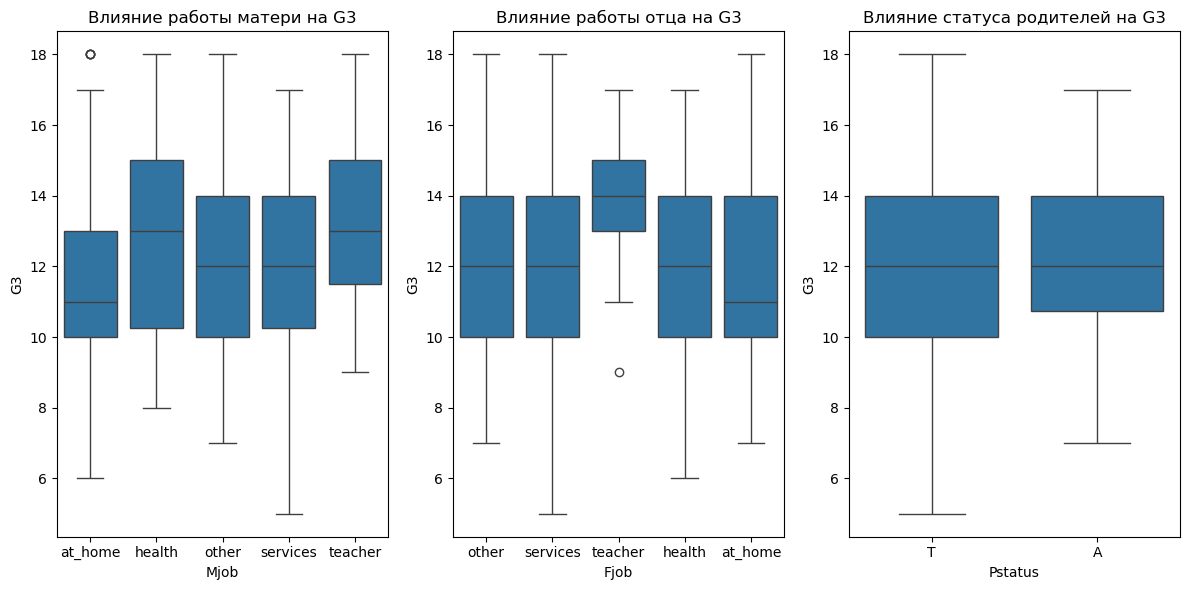

In [27]:
mjob_group = df_cleaned.groupby('Mjob')['G3'].mean()
fjob_group = df_cleaned.groupby('Fjob')['G3'].mean()
pstatus_group = df_cleaned.groupby('Pstatus')['G3'].mean()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Mjob', y='G3', data=df_cleaned)
plt.title("Влияние работы матери на G3")

plt.subplot(1, 3, 2)
sns.boxplot(x='Fjob', y='G3', data=df_cleaned)
plt.title("Влияние работы отца на G3")

plt.subplot(1, 3, 3)
sns.boxplot(x='Pstatus', y='G3', data=df_cleaned)
plt.title("Влияние статуса родителей на G3")

plt.tight_layout()
plt.show()